In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from plot import plot_confusion_matrix_a

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df_train = pd.read_pickle('data_train.pkl')
df_test = pd.read_pickle('data_test.pkl')

In [3]:
target = 'discretize_s4'
predictors = [i for i in df_train.columns if i != target]
print(predictors)

['f107', 'delta_h1', 'delta_h2', 'delta_h3', 'mh1', 'mh2', 'mh3', 'av1', 'av2', 'av3', 'mv1', 'mv2', 'mv3']


In [4]:
X = df_train[predictors].values
X_scaler = MinMaxScaler(feature_range=(0.05, 0.95))
X_scaler.fit(X)
X = X_scaler.transform(X)
df_train[predictors] = X

In [5]:
df_train.head()

f107  delta_h1  delta_h2  delta_h3       mh1       mh2  \
index_datetime                                                               
2001-04-28      0.559713  0.510345  0.329063  0.458682  0.446980  0.373626   
2009-05-15      0.080780  0.190929  0.193520  0.419713  0.180247  0.126869   
2001-02-11      0.383242  0.518023  0.462928  0.649604  0.425994  0.441651   
2002-01-25      0.712380  0.530449  0.426345  0.574121  0.674509  0.574344   
2003-08-23      0.282695  0.366883  0.333170  0.456813  0.297811  0.283178   

                     mh3       av1       av2       av3       mv1       mv2  \
index_datetime                                                               
2001-04-28      0.348970  0.498465  0.315152  0.452499  0.366243  0.225073   
2009-05-15      0.113149  0.190191  0.186294  0.366912  0.194051  0.130044   
2001-02-11      0.494918  0.515355  0.465071  0.676019  0.429066  0.448300   
2002-01-25      0.575115  0.524734  0.421819  0.589599  0.404712  0.366975   
2003-08-23      0.269911  0.361644  0.320996  0.454271  0.376825  0.234989   

                     mv3  discretize_s4  
index_datetime                           
2001-04-28      0.467933            0.0  
2009-05-15      0.399997            0.0  
2001-02-11      0.688827            1.0  
2002-01-25      0.594971            0.0  
2003-08-23      0.447966            0.0

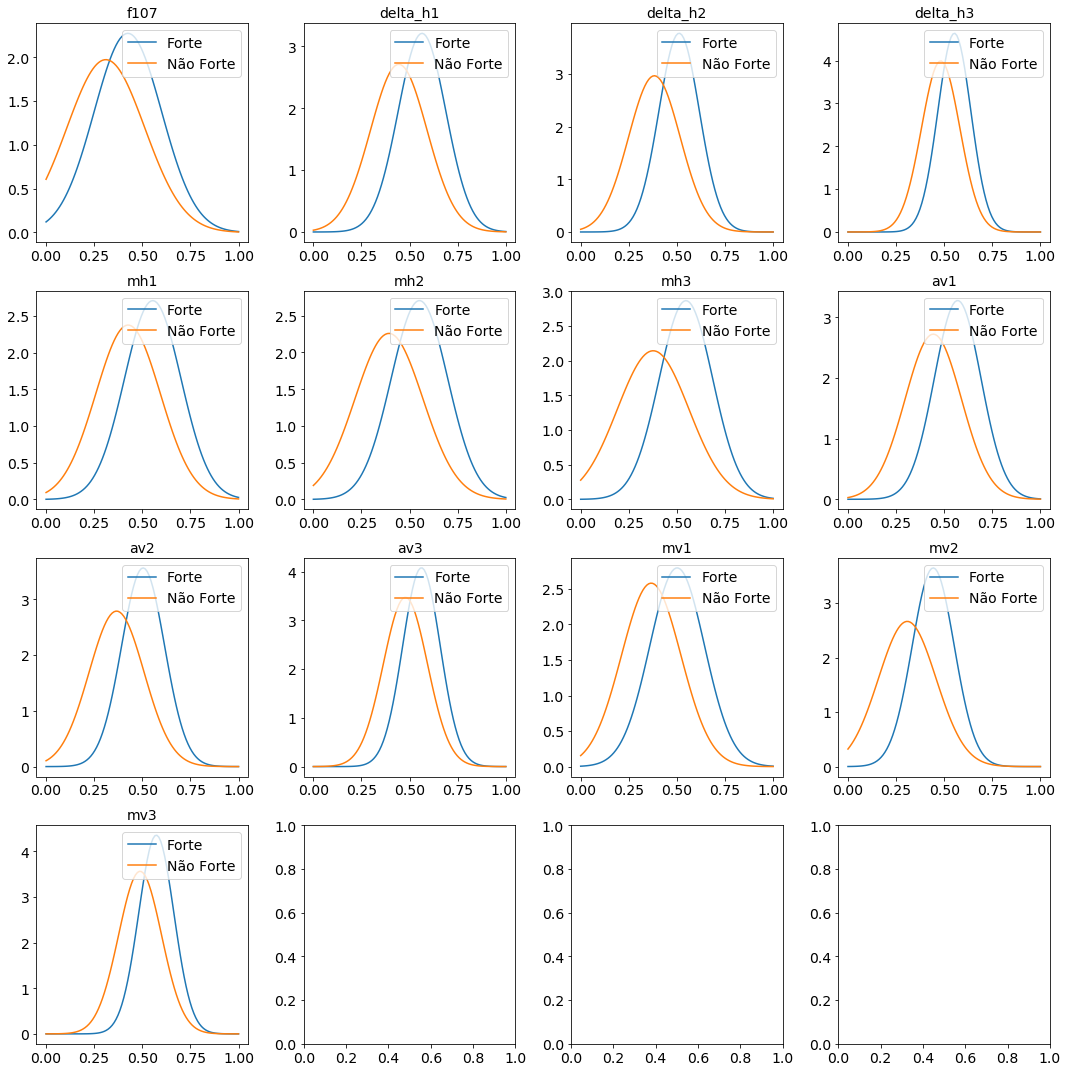

In [6]:
df_0 = df_train.loc[df_train[target] == 0.0]
df_1 = df_train.loc[df_train[target] == 1.0]

list_ns = []
list_s = []
for i in predictors:
    std = df_0[i].std()
    mean = df_0[i].mean()
    list_ns.append((mean, std))
    
    std = df_1[i].std()
    mean = df_1[i].mean()
    list_s.append((mean, std))

def gaussian(x, mu, sig):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

fig, ax = plt.subplots(nrows=4,
                       ncols=4,
                       figsize=(15,15))
x = np.linspace(0., 1.0, 100)
for idx, name, ns, s in zip(range(0, len(predictors)), predictors, list_ns, list_s):
    y_s = gaussian(x, mu=s[0], sig=s[1])
    y_ns = gaussian(x, mu=ns[0], sig=ns[1])
    ax[idx//4][idx%4].plot(x, y_s, label='Forte')
    ax[idx//4][idx%4].plot(x, y_ns,label='Não Forte')
    ax[idx//4][idx%4].set_title(name, {'fontsize': latter_size})
    ax[idx//4][idx%4].legend(loc="upper right")
    
plt.tight_layout()

In [7]:
from pdf_representation import _get_pdf

In [8]:
function = _get_pdf(df_train['f107'], 16, 1)

0.3529439440785051 0.32927987042847917 0.06803245307555311


In [9]:
from pdf_representation import _generate_pdfs

In [10]:
pdf_set_0, pdf_set_1 = _generate_pdfs(df_train, 16, 1, target)

0.26858910583260776 0.2664879768433632 0.057889003107785074
0.4134650549947897 0.4176809202371654 0.04617436128789707
0.3568455730401026 0.36034842600587885 0.042164588932347945
0.46134746580594 0.46578618068692157 0.03220072938528798
0.39875481479288577 0.39928601591484214 0.052279393850261535
0.36168884399406065 0.36240181502612695 0.0543145352017886
0.34153963585684016 0.34144874427099176 0.05618168489698381
0.4159511822637012 0.41938317655473434 0.046130440415938376
0.340499943541102 0.3429839482088488 0.04455234330348174
0.45600048151488587 0.4602641794451012 0.03685677629671296
0.33839643208951475 0.3405017648913142 0.04784950417179872
0.27856594362481574 0.2801384061769704 0.04539050448143843
0.4656781650290954 0.47036611003466683 0.035952698538156753
0.4600547195622435 0.439937963680142 0.060287617455290966
0.5876640807802399 0.5768425947524943 0.042166237117424114
0.5319681606644607 0.5226479951549392 0.03583104767678578
0.5664518315585984 0.5606877946880797 0.0289914592433418

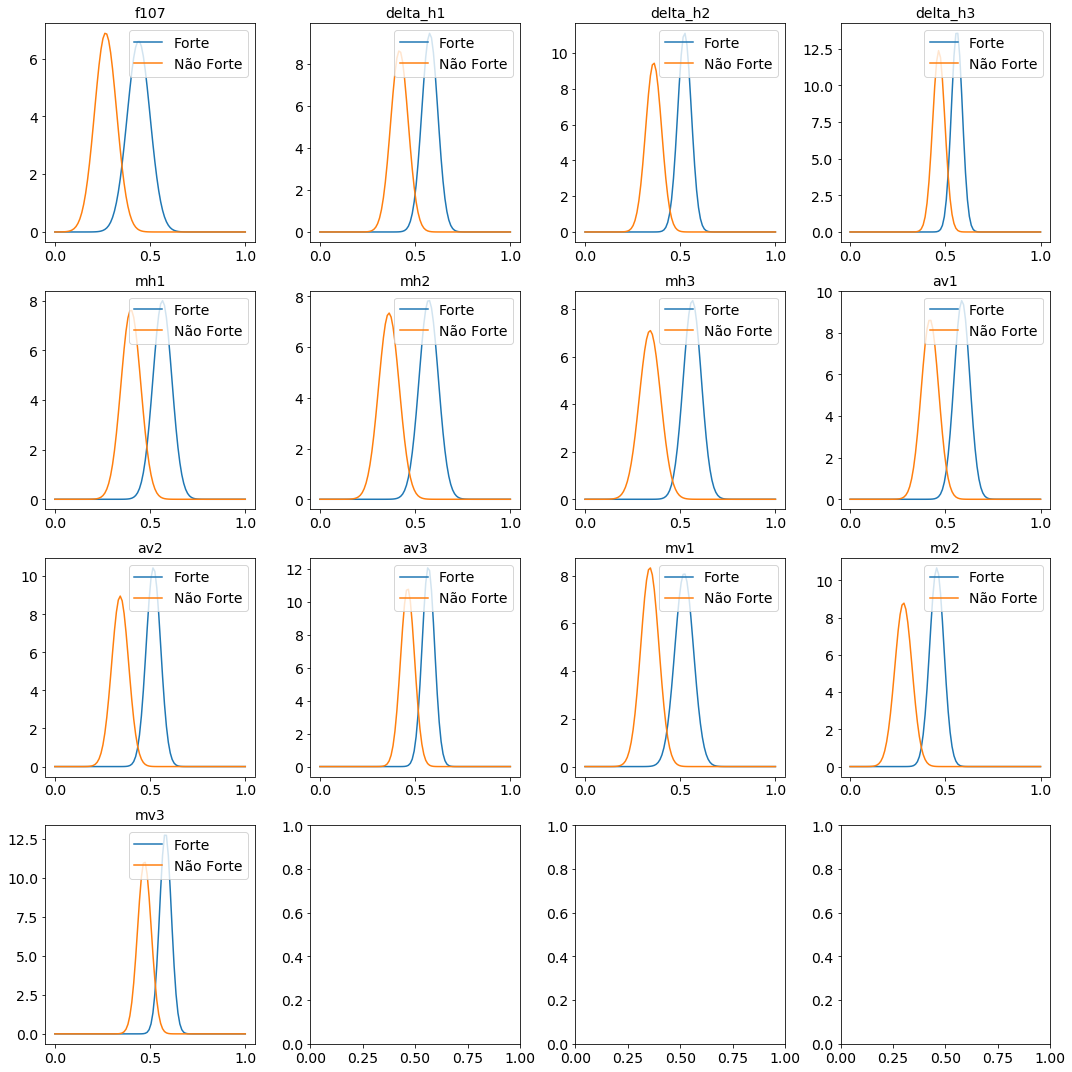

In [11]:
fig, ax = plt.subplots(nrows=4,
                       ncols=4,
                       figsize=(15,15))
x = np.linspace(0., 1.0, 100)
for idx, name, ns, s in zip(range(0, len(predictors)), predictors, pdf_set_0, pdf_set_1):
    y_s = pdf_set_1[name](x)
    y_ns = pdf_set_0[name](x)
    ax[idx//4][idx%4].plot(x, y_s, label='Forte')
    ax[idx//4][idx%4].plot(x, y_ns,label='Não Forte')
    ax[idx//4][idx%4].set_title(name, {'fontsize': latter_size})
    ax[idx//4][idx%4].legend(loc="upper right")
    
plt.tight_layout()

In [12]:
from pdf_representation import generate_pdf_representation

In [13]:
df_aux = generate_pdf_representation(df_train, 16, 1, target)

0.26858910583260776 0.2664879768433632 0.057889003107785074
0.4134650549947897 0.4176809202371654 0.04617436128789707
0.3568455730401026 0.36034842600587885 0.042164588932347945
0.46134746580594 0.46578618068692157 0.03220072938528798
0.39875481479288577 0.39928601591484214 0.052279393850261535
0.36168884399406065 0.36240181502612695 0.0543145352017886
0.34153963585684016 0.34144874427099176 0.05618168489698381
0.4159511822637012 0.41938317655473434 0.046130440415938376
0.340499943541102 0.3429839482088488 0.04455234330348174
0.45600048151488587 0.4602641794451012 0.03685677629671296
0.33839643208951475 0.3405017648913142 0.04784950417179872
0.27856594362481574 0.2801384061769704 0.04539050448143843
0.4656781650290954 0.47036611003466683 0.035952698538156753
0.4600547195622435 0.439937963680142 0.060287617455290966
0.5876640807802399 0.5768425947524943 0.042166237117424114
0.5319681606644607 0.5226479951549392 0.03583104767678578
0.5664518315585984 0.5606877946880797 0.0289914592433418

In [14]:
df_aux.head()

f107_0  delta_h1_0  delta_h2_0  delta_h3_0     mh1_0  \
2001-04-28  1.848953e-05    1.153395    7.184742   12.091393  5.033276   
2009-05-15  4.014091e-02    0.000050    0.003772    4.451483  0.001177   
2001-02-11  9.016059e-01    0.814779    0.490620    0.000001  6.697408   
2002-01-25  9.019053e-13    0.437879    2.779601    0.043169  0.000007   
2003-08-23  6.626646e+00    4.717381    7.686722   11.917405  1.160022   

               mh2_0     mh3_0     av1_0     av2_0         av3_0  ...  \
2001-04-28  7.189861  7.037582  1.989536  7.367156  1.058653e+01  ...   
2009-05-15  0.000606  0.001843  0.000038  0.018454  4.378734e-01  ...   
2001-02-11  2.533439  0.170202  0.993258  0.209612  3.919795e-07  ...   
2002-01-25  0.003627  0.001245  0.637359  1.871229  2.293278e-02  ...   
2003-08-23  2.535124  3.156784  3.951196  7.927716  1.068197e+01  ...   

                   mh1_1         mh2_1         mh3_1         av1_1  \
2001-04-28  4.913460e-01  3.965686e-03  3.385762e-04  9.896643e-01   
2009-05-15  9.785182e-13  1.708064e-16  3.613117e-19  2.136102e-19   
2001-02-11  1.664025e-01  2.998123e-01  2.979649e+00  2.158049e+00   
2002-01-25  7.104372e-01  7.848804e+00  8.119378e+00  3.100220e+00   
2003-08-23  4.777928e-06  7.790541e-07  4.943434e-08  4.295459e-06   

                   av2_1         av3_1         mv1_1         mv2_1  \
2001-04-28  8.026423e-06  2.250474e-02  5.955904e-02  6.363982e-08   
2009-05-15  4.422148e-16  7.615524e-08  2.291303e-09  4.079437e-16   
2001-02-11  4.047257e+00  6.324461e-02  1.439500e+00  1.048497e+01   
2002-01-25  4.466516e-01  1.001367e+01  5.079949e-01  6.585495e-01   
2003-08-23  1.787947e-05  2.719872e-02  1.141440e-01  3.141032e-07   

                   mv3_1  discretize_s4  
2001-04-28  1.628830e-02            0.0  
2009-05-15  4.662508e-07            0.0  
2001-02-11  2.822063e-02            1.0  
2002-01-25  1.162111e+01            0.0  
2003-08-23  1.243881e-03            0.0  

[5 rows x 27 columns]

In [15]:
from pdf_representation import ToPdfRepresentation

In [16]:
to_pdf_representation = ToPdfRepresentation(num_intervals=16, shift=1, target=target)

In [17]:
to_pdf_representation.fit(df_train)

0.26858910583260776 0.2664879768433632 0.057889003107785074
0.4134650549947897 0.4176809202371654 0.04617436128789707
0.3568455730401026 0.36034842600587885 0.042164588932347945
0.46134746580594 0.46578618068692157 0.03220072938528798
0.39875481479288577 0.39928601591484214 0.052279393850261535
0.36168884399406065 0.36240181502612695 0.0543145352017886
0.34153963585684016 0.34144874427099176 0.05618168489698381
0.4159511822637012 0.41938317655473434 0.046130440415938376
0.340499943541102 0.3429839482088488 0.04455234330348174
0.45600048151488587 0.4602641794451012 0.03685677629671296
0.33839643208951475 0.3405017648913142 0.04784950417179872
0.27856594362481574 0.2801384061769704 0.04539050448143843
0.4656781650290954 0.47036611003466683 0.035952698538156753
0.4600547195622435 0.439937963680142 0.060287617455290966
0.5876640807802399 0.5768425947524943 0.042166237117424114
0.5319681606644607 0.5226479951549392 0.03583104767678578
0.5664518315585984 0.5606877946880797 0.0289914592433418

In [18]:
df_aux = to_pdf_representation.transform(df_train)

In [19]:
df_aux.head()

f107_0  delta_h1_0  delta_h2_0  delta_h3_0     mh1_0  \
2001-04-28  1.848953e-05    1.153395    7.184742   12.091393  5.033276   
2009-05-15  4.014091e-02    0.000050    0.003772    4.451483  0.001177   
2001-02-11  9.016059e-01    0.814779    0.490620    0.000001  6.697408   
2002-01-25  9.019053e-13    0.437879    2.779601    0.043169  0.000007   
2003-08-23  6.626646e+00    4.717381    7.686722   11.917405  1.160022   

               mh2_0     mh3_0     av1_0     av2_0         av3_0  ...  \
2001-04-28  7.189861  7.037582  1.989536  7.367156  1.058653e+01  ...   
2009-05-15  0.000606  0.001843  0.000038  0.018454  4.378734e-01  ...   
2001-02-11  2.533439  0.170202  0.993258  0.209612  3.919795e-07  ...   
2002-01-25  0.003627  0.001245  0.637359  1.871229  2.293278e-02  ...   
2003-08-23  2.535124  3.156784  3.951196  7.927716  1.068197e+01  ...   

                   mh1_1         mh2_1         mh3_1         av1_1  \
2001-04-28  4.913460e-01  3.965686e-03  3.385762e-04  9.896643e-01   
2009-05-15  9.785182e-13  1.708064e-16  3.613117e-19  2.136102e-19   
2001-02-11  1.664025e-01  2.998123e-01  2.979649e+00  2.158049e+00   
2002-01-25  7.104372e-01  7.848804e+00  8.119378e+00  3.100220e+00   
2003-08-23  4.777928e-06  7.790541e-07  4.943434e-08  4.295459e-06   

                   av2_1         av3_1         mv1_1         mv2_1  \
2001-04-28  8.026423e-06  2.250474e-02  5.955904e-02  6.363982e-08   
2009-05-15  4.422148e-16  7.615524e-08  2.291303e-09  4.079437e-16   
2001-02-11  4.047257e+00  6.324461e-02  1.439500e+00  1.048497e+01   
2002-01-25  4.466516e-01  1.001367e+01  5.079949e-01  6.585495e-01   
2003-08-23  1.787947e-05  2.719872e-02  1.141440e-01  3.141032e-07   

                   mv3_1  discretize_s4  
2001-04-28  1.628830e-02            0.0  
2009-05-15  4.662508e-07            0.0  
2001-02-11  2.822063e-02            1.0  
2002-01-25  1.162111e+01            0.0  
2003-08-23  1.243881e-03            0.0  

[5 rows x 27 columns]

In [20]:
from neuralnet import MLPGlauston2015

Using TensorFlow backend.


In [21]:
mlp = MLPGlauston2015(batch_size=20,
                      n_epoches=2000)

In [22]:
target = 'discretize_s4'
predictors_aux = [i for i in df_aux.columns if i != target]
print(predictors_aux)

['f107_0', 'delta_h1_0', 'delta_h2_0', 'delta_h3_0', 'mh1_0', 'mh2_0', 'mh3_0', 'av1_0', 'av2_0', 'av3_0', 'mv1_0', 'mv2_0', 'mv3_0', 'f107_1', 'delta_h1_1', 'delta_h2_1', 'delta_h3_1', 'mh1_1', 'mh2_1', 'mh3_1', 'av1_1', 'av2_1', 'av3_1', 'mv1_1', 'mv2_1', 'mv3_1']


In [23]:
mlp.fit(df_aux[predictors_aux].values, df_aux[target].values.reshape((-1,1)))

In [24]:
predict = mlp.transform(df_aux[predictors_aux].values)

RecursionError: maximum recursion depth exceeded

In [ ]:
plot_confusion_matrix_a(df_aux[target].values.reshape((-1,1)),
                        predict,
                        classes=['NS', 'S'],
                        title='Matriz de Confusão')

In [ ]:
from neuralnet import MLPGlaustonKERAS2015 

In [ ]:
mlp = MLPGlaustonKERAS2015(n_epoches=2000,
                           batch_size=20,
                           verbose=0)


In [ ]:
mlp.fit(df_aux[predictors_aux].values, df_aux[target].values.reshape((-1,1)))

In [ ]:
predict = mlp.transform(df_aux[predictors_aux].values)

In [ ]:
plot_confusion_matrix_a(df_aux[target].values.reshape((-1,1)),
                        predict,
                        classes=['NS', 'S'],
                        title='Matriz de Confusão')

In [ ]:
df_0 = df_aux.loc[df_aux[target] == 0.0]
df_1 = df_aux.loc[df_aux[target] == 1.0]

In [ ]:
df_0.shape

In [ ]:
df_1.shape